In [ ]:
%pip install gdown

In [ ]:
!gdown https://drive.google.com/drive/folders/1XLLR97Pc1uriSjJV7yZ5lgkC_IVZDV_g?usp=sharing -O ./data --folder

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import cv2
from PIL import Image, ImageOps

import numpy as np
from sklearn import cluster

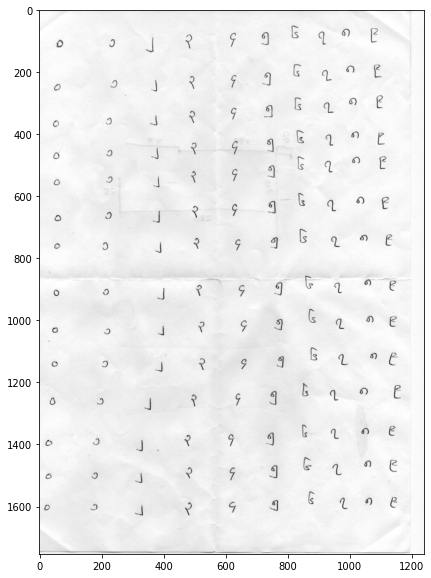

In [2]:
_ = plt.figure(figsize=(10, 10))
with open("data/sample_grid.1.png", "rb") as f:
    im_sample = Image.open(f)
    im_sample_gray = ImageOps.grayscale(im_sample)
    plt.imshow(im_sample_gray, cmap="gray")
    plt.show()

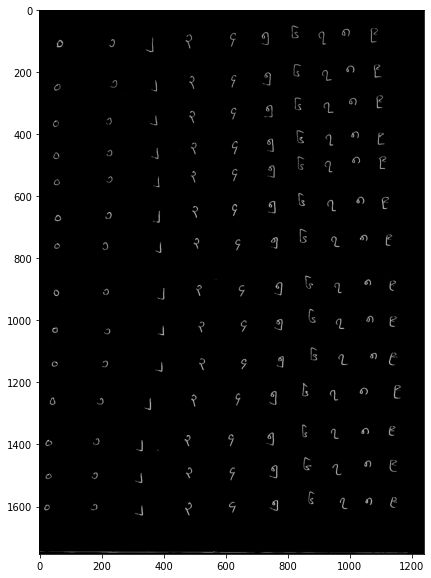

In [4]:
# rudimentary normalization 
np_sample_gray = np.array(im_sample_gray)
oh , ow = np_sample_gray.shape
np_sample_gray = np.array(np_sample_gray * 255 / np_sample_gray.max(), dtype=np.float16)
np_sample_gray = (255 * np_sample_gray).astype(np.uint8)

np_sample_gray[np_sample_gray <= 64] = 0

_ = plt.figure(figsize=(10, 10))
plt.imshow(np_sample_gray, cmap="gray")
plt.show()

In [5]:
# get the points (coordinates) likely to be in a digit
mser = cv2.MSER_create(10)
points, _ = mser.detectRegions(np_sample_gray)
points_X = np.concatenate([np.array(p) for p in points])
points_X.shape, len(points)

((113331, 2), 736)

In [6]:
# discard the points, which are quite white (255 is white, 0 is black)
#selector = np_sample_gray[points_X[:, 1], points_X[:, 0]] <= 255
#points_X = points_X[selector]
#points_X.shape

(113331, 2)

In [7]:
#dbscan = cluster.DBSCAN(eps=1.0, min_samples=15)
#ys = dbscan.fit_predict(points_X)
kmeans = cluster.KMeans(n_clusters=140)
ys = kmeans.fit_predict(points_X)
ys.min(), ys.max()

(0, 139)

In [11]:
def get_center(points_X, ys, cluster_id):
    selector = ys == cluster_id
    min_y, max_y =  points_X[selector, 1].min(), points_X[selector, 1].max()
    min_x, max_x, = points_X[selector, 0].min(), points_X[selector, 0].max()
    w, h = max_x - min_x, max_y - min_y
    cx, cy = min_x + w/2, min_y + h/2
    return cy, cx

def get_digit(np_sample, points_X, ys, cluster_id, width=256, height=256):
    cy, cx = get_center(points_X, ys, cluster_id)
    st_x, st_y = max(0, int(cx - width/2)), max(0, int(cy - height/2))
    en_x, en_y = min(np_sample.shape[1], st_x + width), min(np_sample.shape[0], st_y + height)
    return 255 - np_sample[st_y:en_y, st_x: en_x]
    
def show_digit(np_sample, points_X, ys, cluster_id, ax=plt, width=256, height=256):
    ax.imshow(get_digit(np_sample, points_X, ys, cluster_id, width=width, height=height), cmap="gray")

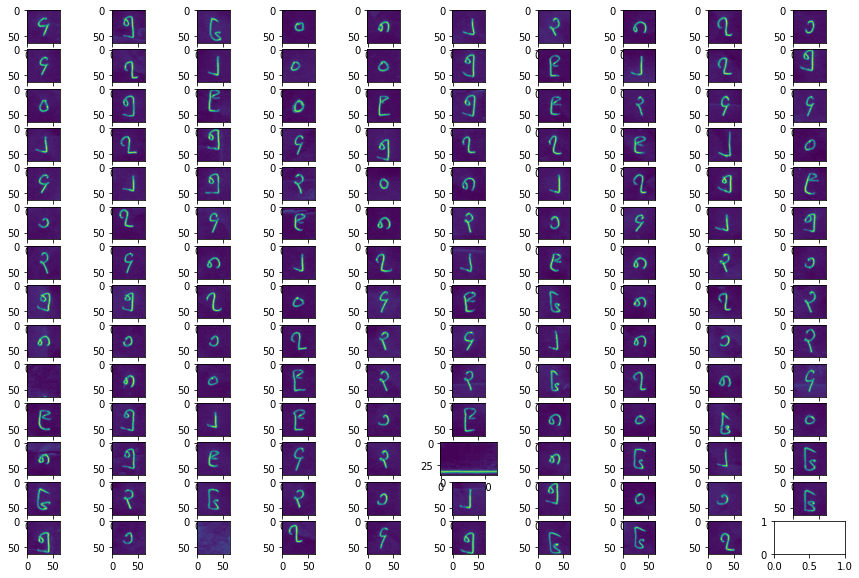

In [13]:
fig, axs = plt.subplots(14, 10, figsize=(15, 10))
id = 0
for r in axs:
    for ax in r:
        show_digit(np_sample_gray, points_X, ys, id , ax=ax, width=64, height=64)
        id = id + 1
        if id >= ys.max():
            break
        
plt.show()

In [ ]:
labels = np.array([
    [5, 2, 8, 0, 5, 8, 7, 3, 5, 8],
    [0, 0, 2, 8, 5, 7, 0, 4, 0, 2],
])